In [1]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# LoRA weights ~3 MB
model_path = "./lzl"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    safety_checker = None,
    requires_safety_checker = False
    )
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe.unet.load_attn_procs(model_path)
pipe.to("mps")

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

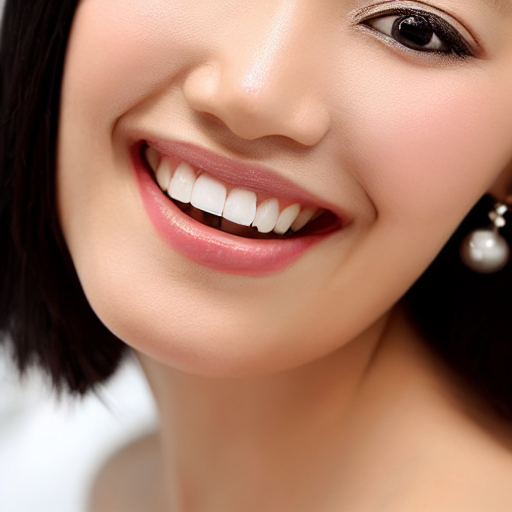

In [5]:
prompt = "1girl,lin_chi_ling,bare shoulders,black hair,collarbone,holding,lips,long hair,looking at viewer,realistic,smile,solo,teeth,upper body,rating:safe"
negative_prompt = "(worst quality, low quality:1.4), (zombie, sketch, interlocked fingers, comic),"

# First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt, num_inference_steps=75, negative_prompt=negative_prompt).images[0]
image